In [ ]:
#this is where I will be merging all 3 of my data sets
#I've learned all of these before, seaborn was used in INFO2201 last year during spring semester
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
#loading in the data sets
regular1 = pd.read_csv("Raw Data/regular1.csv")
regular2 = pd.read_csv("Raw Data/regular 2.csv")
regular3 = pd.read_csv("Raw Data/regular 3.csv")
totals = pd.read_csv("Raw Data/regulartotals.csv")


In [22]:
#merging the data sets for simplicty
stats = pd.concat([regular1, regular2, regular3], ignore_index=True)

In [34]:
#renaming the columns of the next file so they can merge
stats.rename(columns={
    'SEASON_YEAR': 'season_year',
    'TEAM_ID': 'teamId',
    'GAME_ID': 'gameId'}, inplace=True)


In [42]:
#renaming the columns of the totals file so they can merge
#one file had upper case column names and the other had lower case
totals.rename(columns={
    'SEASON_YEAR': 'season_year',
    'TEAM_ID': 'teamId',
    'GAME_ID': 'gameId'
}, inplace=True)

#using pd.merge to merge the two data sets on season year, team id, and game id
winloss = pd.merge(
    stats,
    totals[['season_year', 'teamId', 'gameId', 'WL']],
    on=['season_year', 'teamId', 'gameId'],
    how='left'
)


In [ ]:

#creating a new csv so I don't lose the data
winloss.to_csv("merged_winloss_data.csv", index=False)

In [51]:
#filtering the players in the merged data set by the players involved in the trade
players = ['Kawhi Leonard', 'DeMar DeRozan']
tradedata1 = winloss[winloss['personName'].isin(players)]

In [ ]:
#this code aggregates the data by player and season, calculating total games played, total points scored, and average plus-minus points
#the total points data will be divided by the games played to get a points per game average

tradestats1 = tradedata1.groupby(['personName', 'season_year']).agg(
    games_played=('gameId', 'nunique'),
    total_points=('points', 'sum'),
    avg_plus_minus=('plusMinusPoints', 'mean')
).reset_index()


In [74]:
# creating a new points per game column calculated by total points divided by games played
tradestats1 = tradedata1.groupby(['personName', 'season_year']).agg(
    games_played=('gameId', 'nunique'),
    total_points=('points', 'sum'),
    avg_plus_minus=('plusMinusPoints', 'mean')
).reset_index()

#created a new points per game column calculated by total points divided by games played
tradestats1['ppg'] = tradestats1['total_points'] / tradestats1['games_played']
#reordering the columns for better readability
tradestats1 = tradestats1[['personName', 'season_year', 'games_played', 'ppg', 'avg_plus_minus']]

In [95]:
# CHARTS FOR THE TRADE
tradeseasons1 = ['2016-17', '2017-18', '2018-19']
filtered1 = tradestats1[
    (tradestats1['personName'].isin(['Kawhi Leonard', 'DeMar DeRozan'])) &
    (tradestats1['season_year'].isin(tradeseasons1))
]



C:\Users\crawf\AppData\Local\Temp\ipykernel_81964\2029336494.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


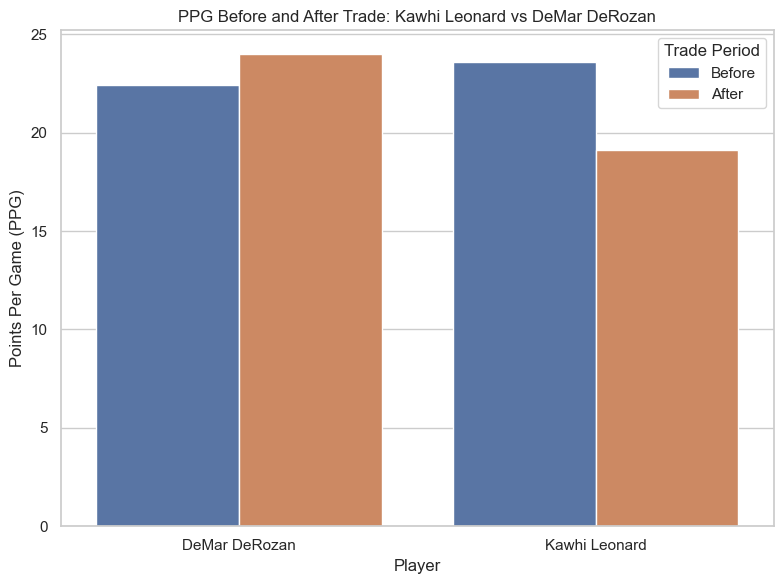

In [106]:
# this is a bar chart for points per game before and after the trade
plt.figure(figsize=(8, 6))
sns.barplot(
    data=filtered1,
    x='personName',
    y='ppg',
    hue='trade_period',
    hue_order=['Before', 'After'],
    ci=None  # disables error bars
)

plt.title('PPG Before and After Trade: Kawhi Leonard vs DeMar DeRozan')
plt.xlabel('Player')
plt.ylabel('Points Per Game (PPG)')
plt.legend(title='Trade Period')
plt.tight_layout()
plt.show()

